In [54]:
import random
import numpy as np
from tqdm.auto import tqdm
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%reload_ext autoreload
%autoreload 2
# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import os
os.mkdir('imgs/')

# Task 1 Bifurcation map

In [2]:
# Task 1 Bifurcation map

## Evolution
x_0 = random.random()
r = 20 # max number of R
n = 1000 # iterate for n values
steps = 100 # divide interval from 0 to R into steps
m = 100 # save last m values 

def bifurcation(x, r):
    return r * x * (1 - x)


@interact(r = 2.9, n=100, m=200)
def evolution(r, n, m):
    res = []
    x = random.random()
    for _ in range(n):
        x = bifurcation(x, r)
    for _ in range(m):
        x = bifurcation(x, r)
        res.append(x)
    plt.plot(res)   

interactive(children=(FloatSlider(value=2.9, description='r', max=8.7, min=-2.9), IntSlider(value=100, descrip…

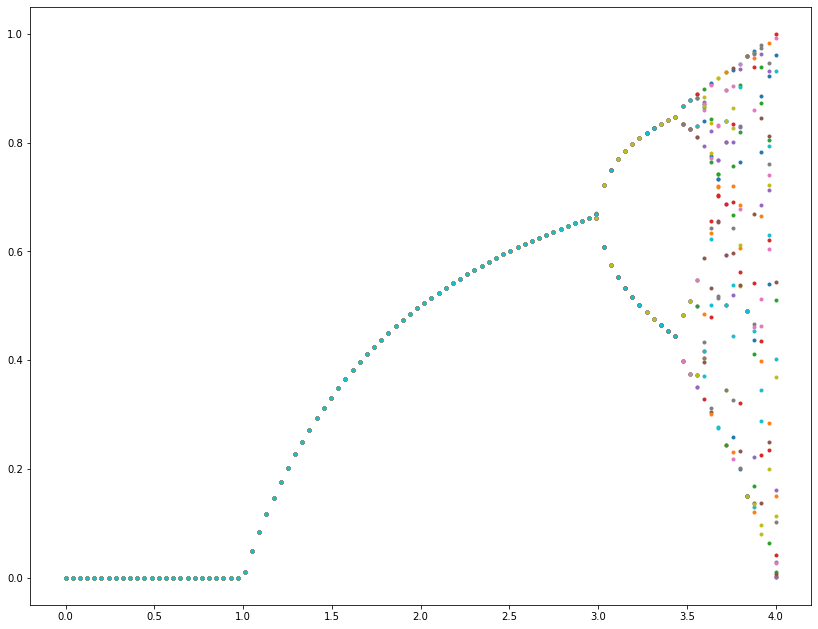

In [3]:
from bifurcation import bifurcation_map, plot_bifurcation
r_values, bf = bifurcation_map(4, 100, n=200, m=20)
plot_bifurcation(r_values, bf)

# Task 2: Julia set

## T2.1	Black and white colors of pixels are correct

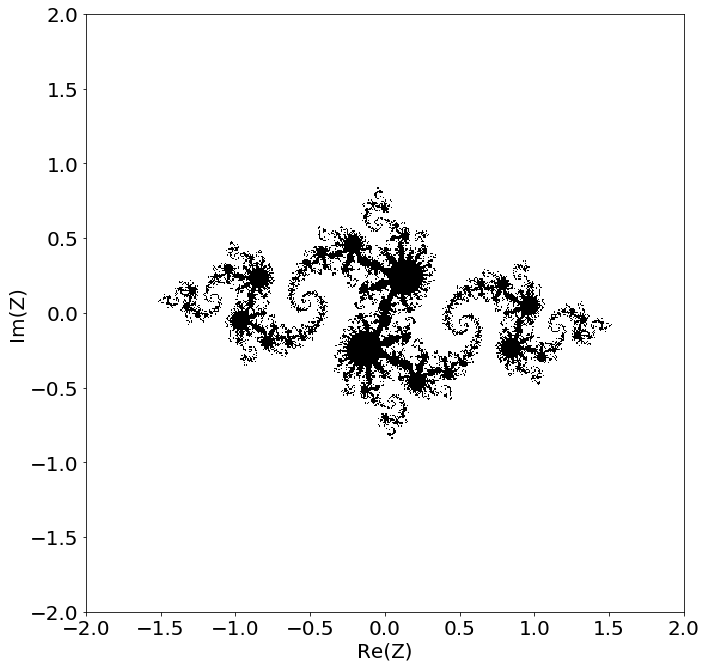

In [20]:
from julia import julia_binary, plot_fractal
r = (1 + 5**0.5) / 2 # Golden ratio
jb = julia_binary(min_value=-2, max_value=2, density=500, max_iter=100)
plot_fractal(jb)

## T2.2	Different color for bifurcation points

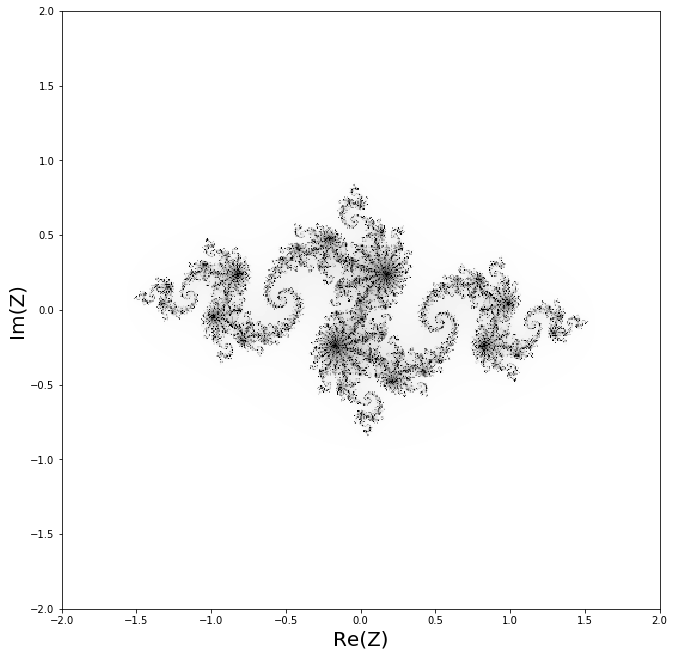

In [5]:
from julia import julia, plot_fractal
j = julia(min_value=-2, max_value=2, density=500, max_iter=500)
plot_fractal(j)

## T2.3 Generate figure on Mandelbrot set

### Julia set with $c = 1 - r$. Given by $z = z^2 + c $

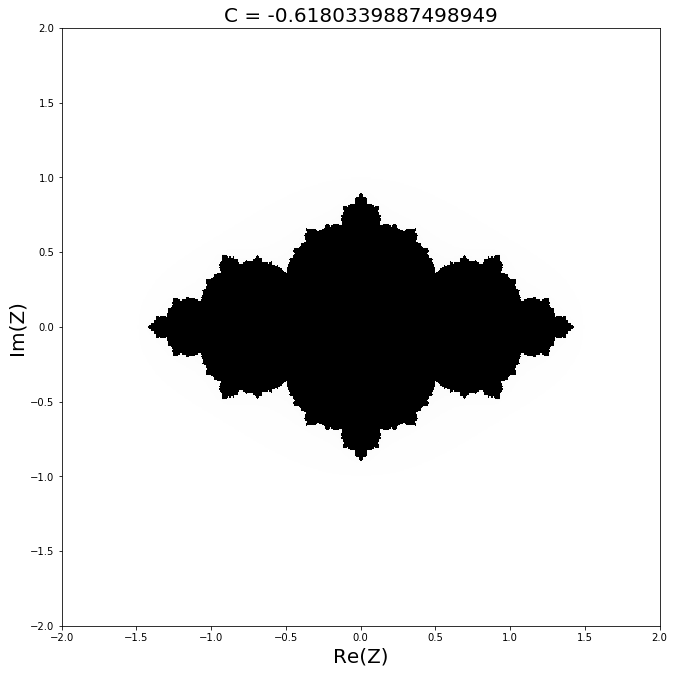

In [6]:
from julia import julia, plot_fractal
r = (1 + 5**0.5) / 2 # Golden ratio
c=1 - r
fake_mb = julia(min_value=-2, max_value=2, c=1 - r, density=500, max_iter=500)
plot_fractal(fake_mb, c)

### Mandelbrot set with $c = 1 - r$. Given by $z = c^2 + z, c = 0$

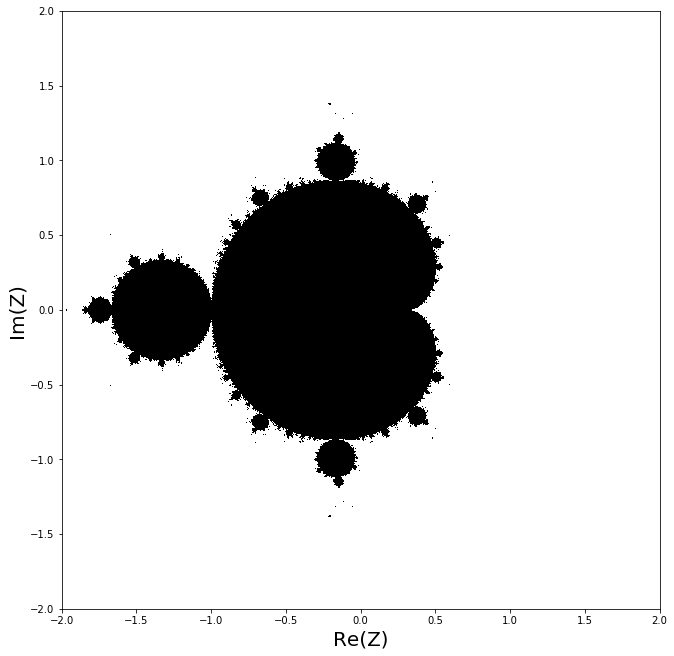

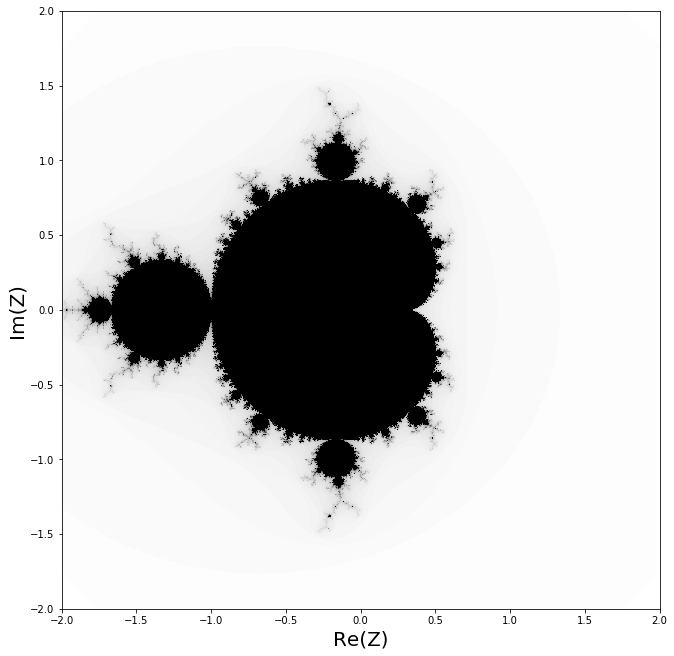

In [7]:
from julia import mandelbrot, mandelbrot_binary, plot_fractal
mb = mandelbrot_binary(min_value=-1.5, max_value=1.5, density=1000)
m = mandelbrot(min_value=-1.5, max_value=1.5, density=1000)
plot_fractal(mb)
plot_fractal(m)

## T2.4 Plot figures for $c = e^{ia}, a \in (0, 2\pi)$ 

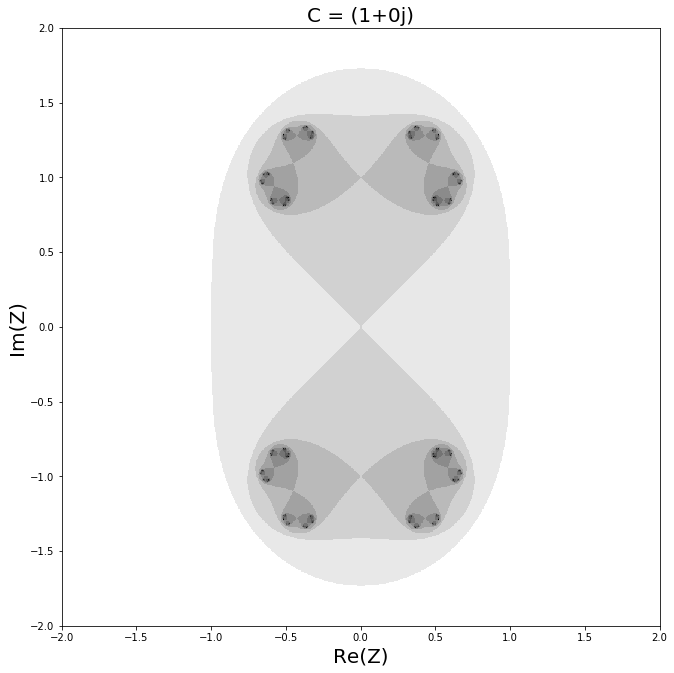

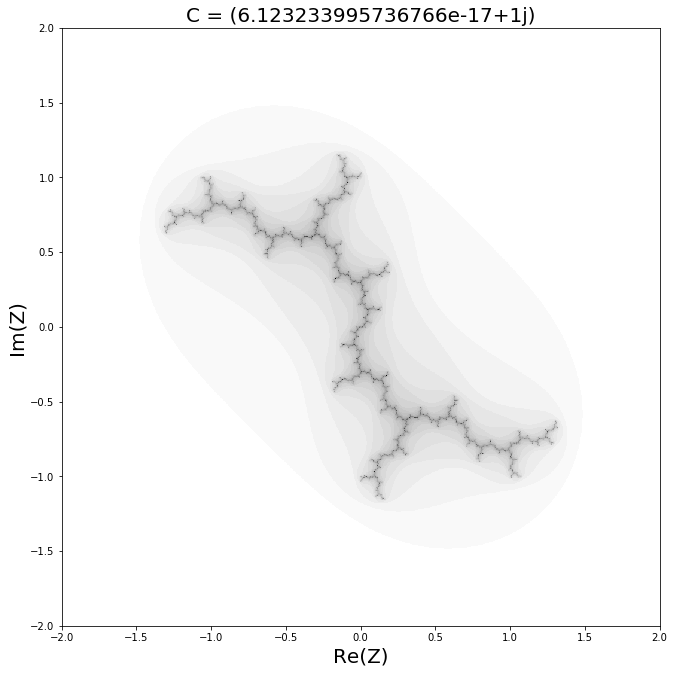

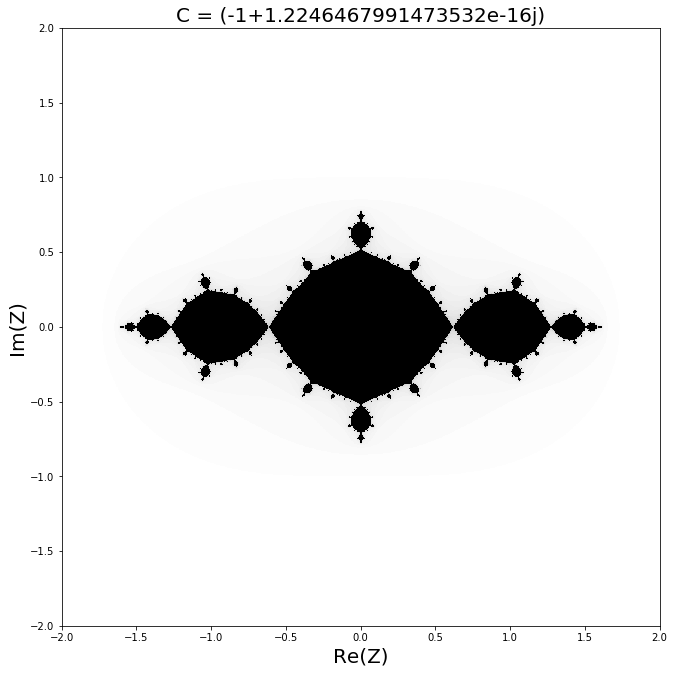

In [416]:
import cmath
r = 1
alfa_values = np.linspace(0, np.pi, 4)
c_values = [cmath.rect(r, angle) for angle in alfa_values]
for c in c_values:
    j = julia(min_value=-2, max_value=2, c=c, density=1000)
    plot_fractal(j, c)
#     jb = julia_binary(min_value=-2, max_value=2, limit=10, max_iter=30, c=c, density=500)
#     plot_fractal(jb, c)


## T2.5 Plot gif of figures for $c = e^{ia}, a \in (0, 2\pi)$ 

#### GIF with different colours for different points

In [12]:
from julia import create_julia_gif
images = create_julia_gif(r=1, c_density=80, duration=15, name='task2_5_1', density=600)

![julia_gif_1](imgs/task2_5_1.gif)

In [17]:
from julia import create_julia_gif
images = create_julia_gif(r=1, c_density=50, duration=10, name='task2_5_2', binary=True, density=600, max_iter=15)

![julia_gif_2](imgs/task2_5_2.gif)

# Task 3: Schelling model

## T3.1	9 gifs for 9 values of R

In [11]:
from schelling import game_2d
%matplotlib inline
R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]

N = 50
C = 2
game_length = 50
global_moved = []
for r in R:
    moved = game_2d(N, C, r, game_length, name=f'schelling_{int(r*8)}', figsize=(6, 6))
    global_moved.append(moved)

![schelling_0](imgs/schelling_0.gif)
![schelling_1](imgs/schelling_1.gif)
![schelling_2](imgs/schelling_2.gif)
![schelling_3](imgs/schelling_3.gif)
![schelling_4](imgs/schelling_4.gif)
![schelling_5](imgs/schelling_5.gif)
![schelling_6](imgs/schelling_6.gif)
![schelling_7](imgs/schelling_7.gif)
![schelling_8](imgs/schelling_8.gif)

#### 2D model with C=3

In [42]:
from schelling import game_2d
%matplotlib inline
R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]

N = 100
C = 3
game_length = 100
global_moved_3 = []
for r in R:
    moved = game_2d(N, C, r, game_length, name=f'schelling_{C}_{int(r*8)}', figsize=(10, 10))
    global_moved_3.append(moved)

In [ ]:
![schelling_2_1](imgs/schelling_3_2.gif)
![schelling_2_1](imgs/schelling_3_3.gif)
![schelling_2_1](imgs/schelling_3_4.gif)
![schelling_2_1](imgs/schelling_3_5.gif)
![schelling_2_1](imgs/schelling_3_6.gif)
![schelling_2_1](imgs/schelling_3_7.gif)

#### 2D model with C=10

In [43]:
from schelling import game_2d
%matplotlib inline
R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]

N = 100
C = 10
game_length = 200
global_moved_10 = []
for r in R:
    moved = game_2d(N, C, r, game_length, name=f'schelling_{C}_{int(r*8)}', figsize=(10, 10))
    global_moved_10.append(moved)

In [46]:
N = 1000
C = 10
game_length = 250
r = R[3]
_ = game_2d(N, C, r, game_length, name=f'schelling_{C}_{int(r*8)}_big', figsize=(10, 10))

![schelling_3_1](imgs/schelling_10_3.gif)
![schelling_3_1_big](imgs/schelling_10_3_big.gif)

## T3.2 Plot

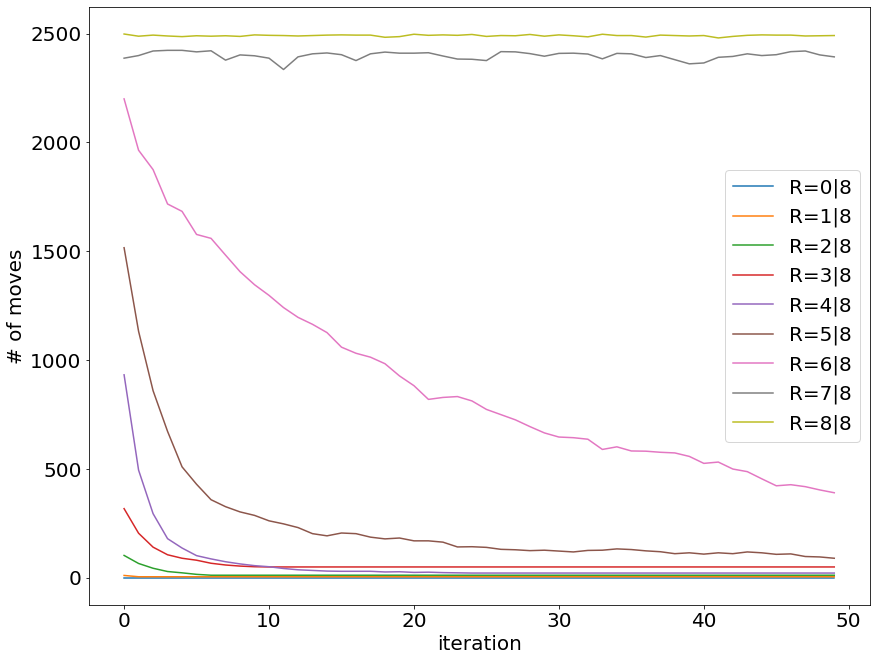

In [25]:
fig, ax = plt.subplots(figsize=(14,11))
# fig.figure(figsize=(14,11))
for i, r in enumerate(R):
    ax.plot(global_moved[i], label=f'R={int(r*8)}|8')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves', fontsize=20)
    ax.legend(fontsize=20)
# plt.plot(global_moved[0], label='r')

In [ ]:
fig, ax = plt.subplots(figsize=(14,11))
# fig.figure(figsize=(14,11))
for i, r in enumerate(R):
    ax.plot(global_moved_3[i], label=f'R={int(r*8)}|8')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves', fontsize=20)
    ax.legend(fontsize=20)
# plt.plot(global_moved[0], label='r')

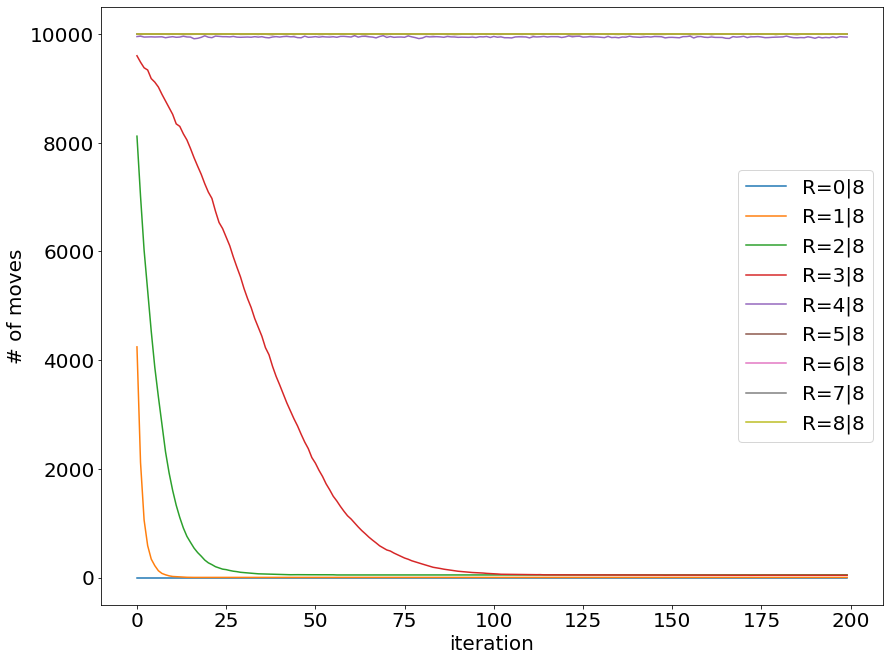

In [44]:
fig, ax = plt.subplots(figsize=(14,11))
for i, r in enumerate(R):
    ax.plot(global_moved_10[i], label=f'R={int(r*8)}|8')
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves', fontsize=20)
    ax.legend(fontsize=20)
# plt.plot(global_moved[0], label='r')

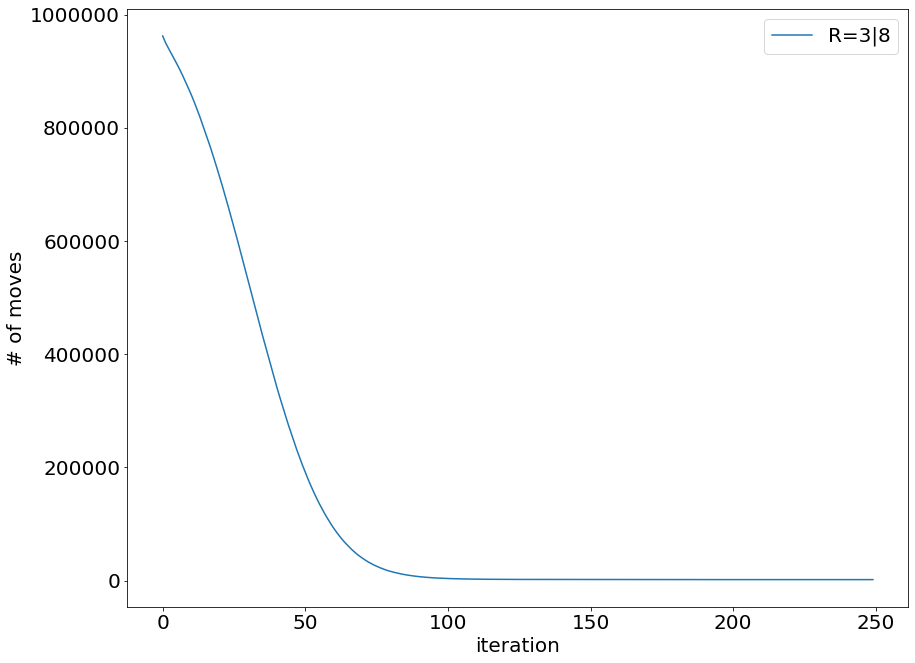

In [53]:
fig, ax = plt.subplots(figsize=(14,11))
ax.plot(_, label=f'R={int(r*8)}|8')
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('# of moves', fontsize=20)
ax.legend(fontsize=20)

## T3.3 Bonus: 3D Schelling model

### Check that everything works correctly
Plot 3D cube and projections on each plane for one class (here I chosen to project class 1), so color defines total number of 'ones' in that plane cell

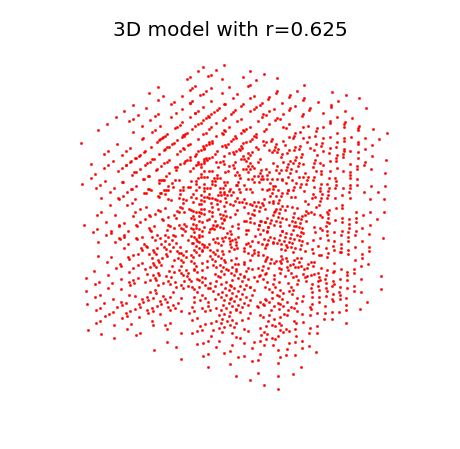

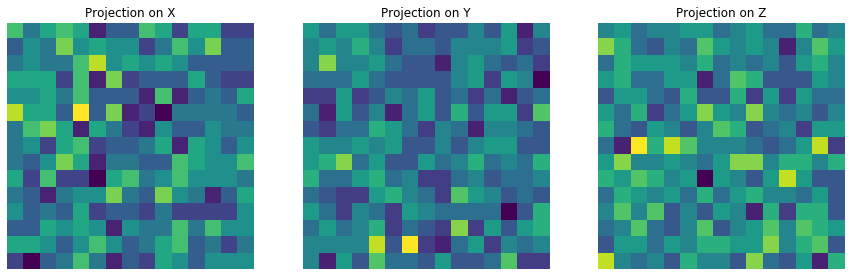

In [18]:
from tqdm.auto import tqdm
from schelling_3d import init_map_3d, prepare_3d_plot, plot_3d, plot_projections
%matplotlib inline
# %matplotlib notebook
R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
N = 15
C = 2 # Number of different neighbourhoods
r = R[5]
game_map = init_map_3d(N,C)
x, y, z, c, proj_x, proj_y, proj_z = prepare_3d_plot(game_map, projections=True)
# Plot 3D cube to check 
plot_3d(x, y, z, c, r, figsize=(8, 8))
# Plot projections
plot_projections(proj_x, proj_y, proj_z)

If we increase N size of cube becomes to big to visialize it properly, some projections are more reliable. ALso notice, that in the beginnig cells are almost evenly distributed.

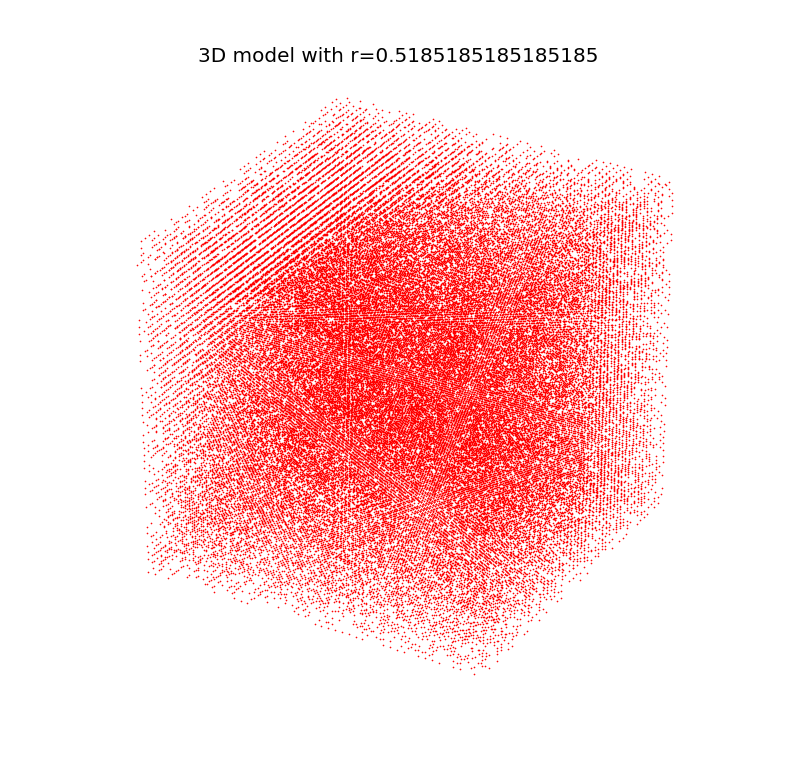

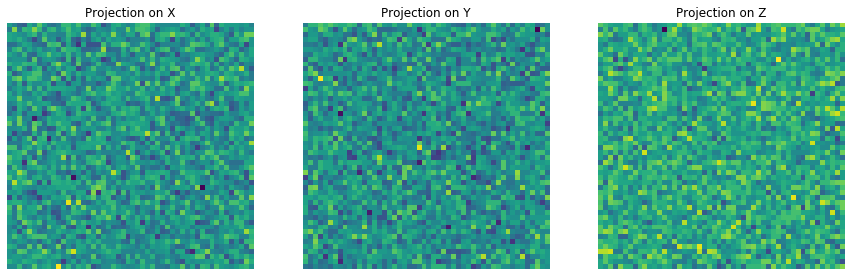

In [36]:
%matplotlib inline
from schelling_3d import plot_3d
R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
N = 50
C = 2 # Number of different neighbourhoods
game_map = init_map_3d(N,C)
x, y, z, c, proj_x, proj_y, proj_z = prepare_3d_plot(game_map, projections=True)
plot_3d(x, y, z, c, r, figsize=(14, 14))
plot_projections(proj_x, proj_y, proj_z)

Now let's start the 3D game and see, how distrubutions are changing

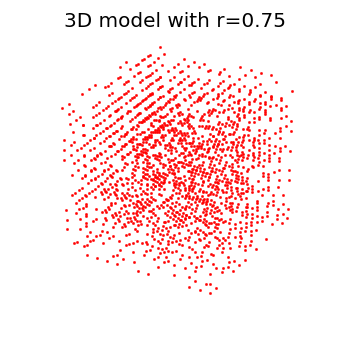

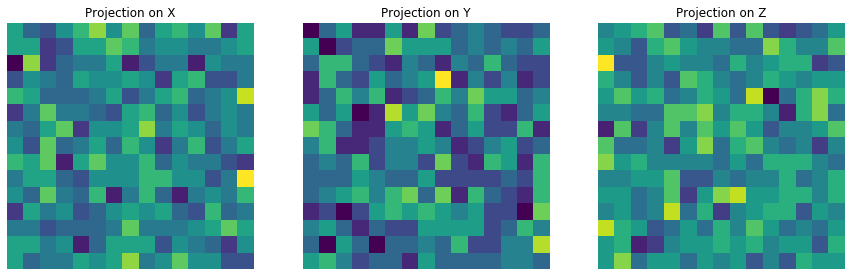

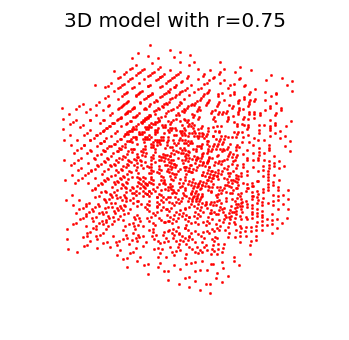

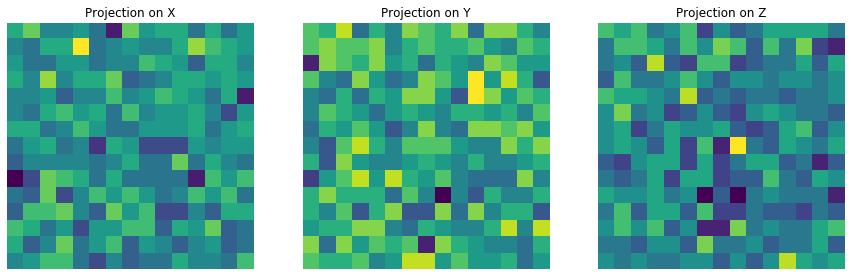

In [24]:
from tqdm.auto import tqdm
from schelling_3d import game_3d
%matplotlib inline

N = 15
C = 2 # Number of different neighbourhoods
game_length = 80
projective=False
r = R[6]
fname=f'schelling_{projective}_{int(r*8)}_{N}_{game_length}'
final_map, moved = game_3d(N, C, r, game_length, name=fname, proj=projective, figsize=(6, 6), fps=8, verbouse=True)

Let's look at the number of moving cells

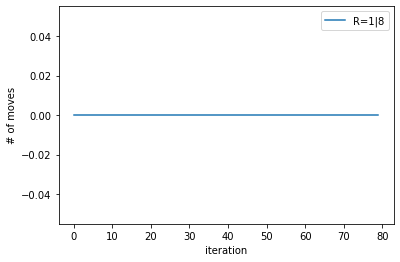

In [186]:
fig, ax = plt.subplots()
# fig.figure(figsize=(14,11))
ax.plot(moved, label=f'R={int(r*27)}|27')
ax.set_xlabel('iteration')
ax.set_ylabel('# of moves')
ax.legend()
plt.savefig(f'imgs/{fname}.png')

### Generate GIFs for different R values
#### First: Find values of R, when something interesting happens.

In [26]:
from tqdm.auto import tqdm
from schelling_3d import game_3d
%matplotlib inline
R_3d = [i / 27 for i in range(27)]
N = 10
C = 2 # Number of different neighbourhoods
game_length = 20
projective=True

global_moved = []
for r in R_3d:
    fname=f'tmp/schelling_{projective}_{int(r*27)}_{N}_{game_length}'
    _, moved = game_3d(N, C, r, game_length, name=fname, proj=projective, figsize=(6, 6), fps=8, verbouse=False)
    global_moved.append(moved)

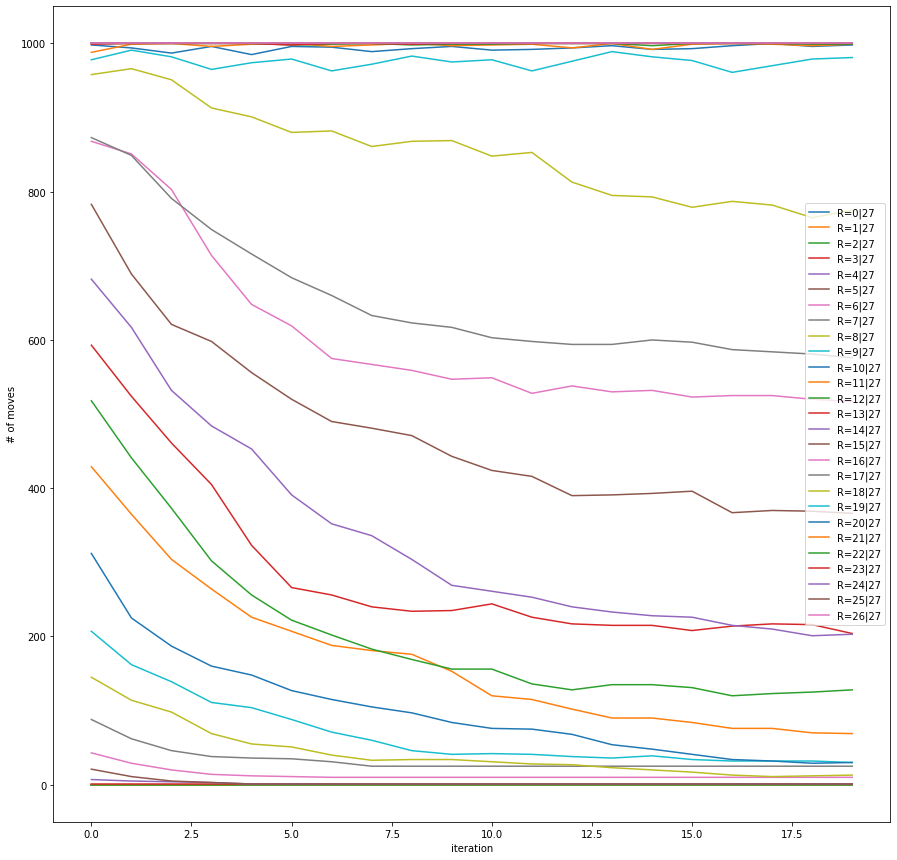

In [204]:
fig, ax = plt.subplots(figsize=(15, 15))
# fig.figure(figsize=(14,11))
for i, r in enumerate(R_3d):
    ax.plot(global_moved[i], label=f'R={int(r*27)}|27')
    ax.set_xlabel('iteration', fontsize=20)
    ax.set_ylabel('# of moves')
    ax.legend()
# plt.plot(global_moved[0], label='r')

#### Let's take $R = 15$ and look how far will it get

In [205]:
from tqdm.auto import tqdm
from schelling_3d import game_3d
%matplotlib inline
N = 100
C = 2 # Number of different neighbourhoods
game_length = 100
projective=True
r = R_3d[15]
fname=f'schelling_{projective}_{int(r*27)}_{N}_{game_length}'
_, moved_15 = game_3d(N, C, r, game_length, name=fname, proj=projective, figsize=(6, 6), fps=8, verbouse=False)

Launch this cell to see gif:
![schelling_3d_15](imgs/schelling_True_15_100_100.gif)


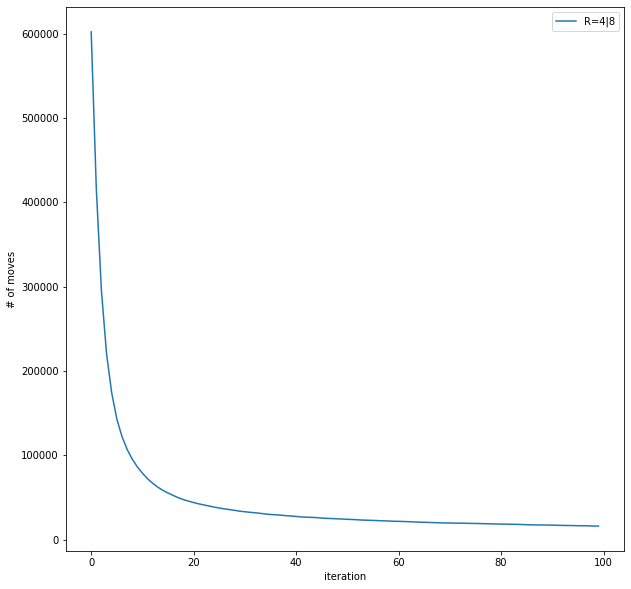

In [206]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(moved_15, label=f'R={int(r*8)}|8')
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('# of moves', fontsize=20)
ax.legend(fontsize=20)
plt.savefig(f'imgs/{fname}.png')

Select R = 14 and wait VERY long.
Set verbouse=True to get initial and final distributions of cells.

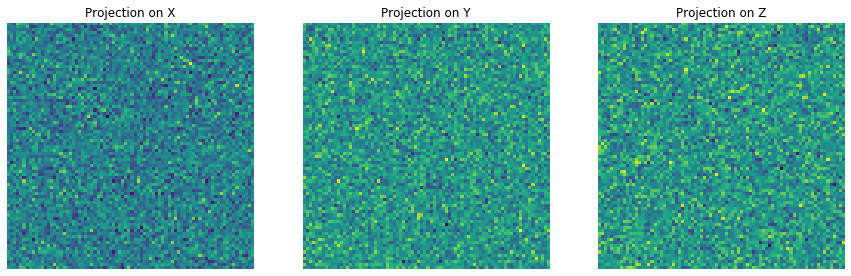

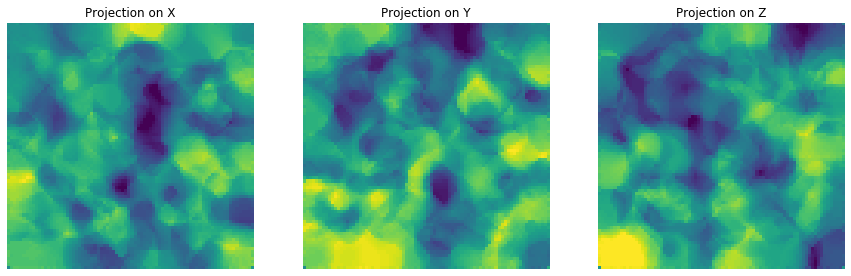

In [27]:
from tqdm.auto import tqdm
from schelling_3d import game_3d
%matplotlib inline
N = 80
C = 2 # Number of different neighbourhoods
game_length = 200
projective=True
r = R_3d[14]
fname=f'schelling_{projective}_{int(r*27)}_{N}_{game_length}'
final_map, moved_14 = game_3d(N, C, r, game_length, name=fname, proj=projective, figsize=(6, 6), fps=8, verbouse=True)

Let's generate GIF for 3D cube

In [38]:
from tqdm.auto import tqdm
from schelling_3d import game_3d
%matplotlib inline
N = 20
C = 2 # Number of different neighbourhoods
game_length = 1000
projective=False
r = R_3d[14]
fname=f'schelling_{projective}_{int(r*27)}_{N}_{game_length}'
final_map, moved_14 = game_3d(N, C, r, game_length, name=fname, proj=projective, figsize=(6, 6), fps=10, verbouse=False)

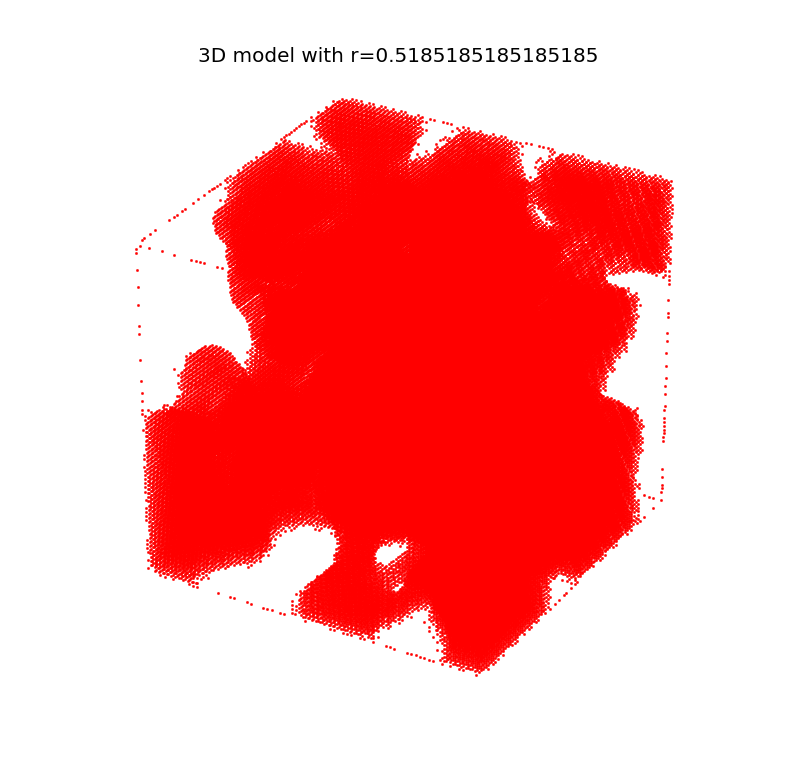

In [33]:
x, y, z, c, proj_x, proj_y, proj_z = prepare_3d_plot(final_map, projections=True)
plot_3d(x, y, z, c, r, figsize=(14, 14))
# plot_projections(proj_x, proj_y, proj_z)

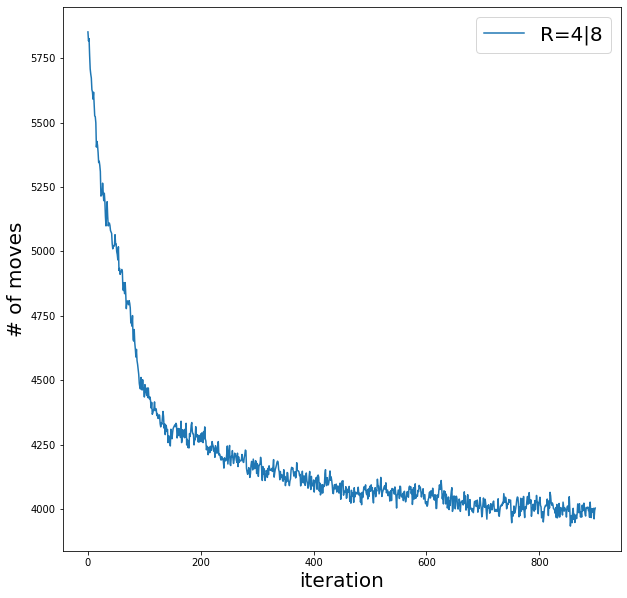

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(moved_14[100:], label=f'R={int(r*8)}|8')
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('# of moves', fontsize=20)
ax.legend(fontsize=20)
plt.savefig(f'imgs/{fname}.png')